### 8-6. 学習Data としての画像の構造を理解しよう
画像の分類問題を解いていく。
まず、Data がどのような形をしているのか、ということを把握する。

In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# cifar10 と言う Dataset を扱う。
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"y_test.shape: {y_test.shape}")

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


- x_train, x_test には画像Data が格納。
- y_train, y_test にはそれぞれの画像に対応する分類Label がついている。

はず。

In [3]:
# 画像Data の中身を表示する
print(f"shap: {x_train[0].shape}")
print(x_train[0])

shap: (32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


画像Data も数値の配列で表すことができる。
- 縦: 32pixel
- 横: 32pixel
- 各Pixelに R, G, B を持っている

画像の形で表示する

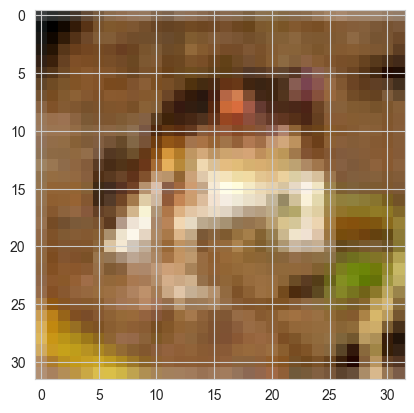

In [4]:
# 学習Data の最初の画像を表示
plt.imshow(x_train[0])
plt.show()

分類Label を表示する

In [5]:
# 学習Data の１番最初の画像の Label を表示
print(y_train[0])

# 学習Data, Test-data の Label が取り扱う値を列挙
print(np.unique(y_train))
print(np.unique(y_test))

[6]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


- カエルの画像は 6 で表現されている。
- Dataset は10分類の画像が格納されている。

Label の番号と名前を対応づける

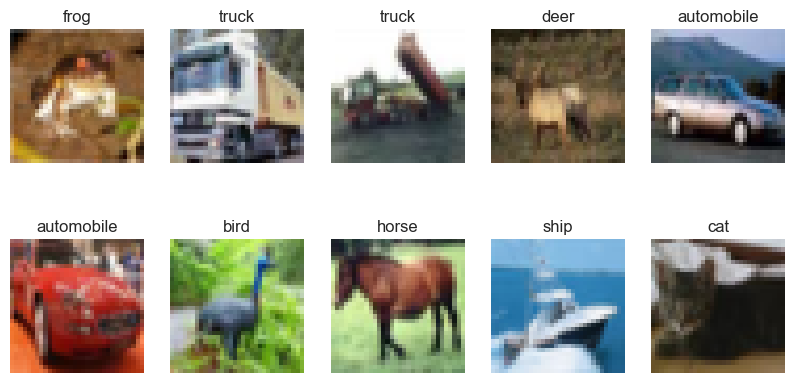

In [6]:
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10, 5))

for index in range(10):
    img = x_train[index]
    label = label_names[y_train[index][0]]
    plt.subplot(2, 5, index + 1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img)

### 8-7. 深層学習Library を使って Zero から画像Data を学習してみよう
まず、Data の前処理を行ない、その後に Model を作成して学習を行なう。

#### 前処理
- 各RGB の３種類の値を正規化し、0~1 の値しかとらないようするる。
- 分類Label を Onehot-encoding する。

Data の前処理

In [7]:
from tensorflow.keras.utils import to_categorical

# 画像の各pixel の値が 0~1 の間の値をとるようにする
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# Label の Onehot-encoding を行なう
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Model の構築と学習

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [9]:
# Model の構築
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 padding="same",
                 input_shape=x_train.shape[1:],
                 activation="relu",
                 name="conv2d_1"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding="same",
                 input_shape=x_train.shape[1:],
                 activation="relu",
                 name="conv2d_2"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(len(label_names), activation="softmax"))

In [10]:
# Model の概要を表示
print(model.summary())

model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2

None


Model の精度評価

In [11]:
batch_size = 64
epochs = 20

# 学習開始
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/20
704/704 [==============================] - 31s 43ms/step - loss: 1.3730 - accuracy: 0.5071 - val_loss: 1.0621 - val_accuracy: 0.6390
Epoch 2/20
704/704 [==============================] - 33s 47ms/step - loss: 1.0002 - accuracy: 0.6492 - val_loss: 0.9257 - val_accuracy: 0.6832
Epoch 3/20
704/704 [==============================] - 33s 47ms/step - loss: 0.8427 - accuracy: 0.7075 - val_loss: 0.9120 - val_accuracy: 0.6848
Epoch 4/20
704/704 [==============================] - 35s 50ms/step - loss: 0.7008 - accuracy: 0.7532 - val_loss: 0.8707 - val_accuracy: 0.6988
Epoch 5/20
704/704 [==============================] - 38s 54ms/step - loss: 0.5768 - accuracy: 0.7988 - val_loss: 0.8581 - val_accuracy: 0.7162
Epoch 6/20
704/704 [==============================] - 36s 51ms/step - loss: 0.4553 - accuracy: 0.8408 - val_loss: 0.8716 - val_accuracy: 0.7276
Epoch 7/20
704/704 [==============================] - 37s 53ms/step - loss: 0.3370 - accuracy: 0.8853 - val_loss: 0.9205 - val_accuracy:

Model の精度評価

In [12]:
# 正答率を計算
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 2.0559 - accuracy: 0.7031
0.7031000256538391


### 8-8. 学習した結果を評価しよう
毎回の Epoch の最後の損失関数と精度を Graph にしてみる。

損失関数と精度を可視化する

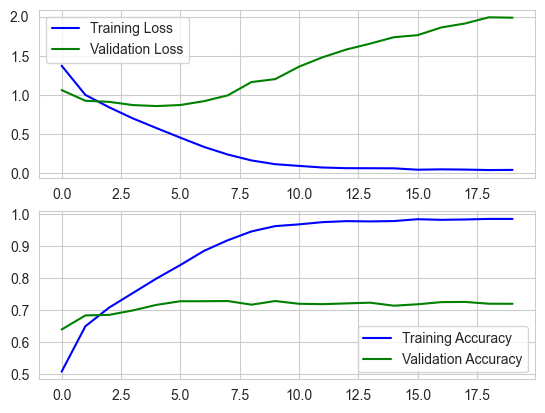

In [13]:
# 評価関数と精度の Graph表示
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history["loss"], color="b", label="Training Loss")
ax[0].plot(history.history["val_loss"], color="g", label="Validation Loss")
legend = ax[0].legend()

ax[1].plot(history.history["accuracy"], color="b", label="Training Accuracy")
ax[1].plot(history.history["val_accuracy"], color="g", label="Validation Accuracy")
legend = ax[1].legend()

- 学習Data は、Epoch が進むごとに順調に上がっているが検証Data では途中から向上が見られなくなっている。
- 損失関数は、学習Data は順調に現象しているが、検証Data は途中から増加している。
    >損失関数の増加 = 認識を誤っているときにより大きく誤っている（もしくは正解であったとしても確率は低く出ている）= 過学習が起こっている。

混同行列の表示①

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

In [15]:
y_pred = model.predict(x_test)
# y_pred は各Class になる確率が入っているので、それぞれで最大値だけ取る
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cf_matrix = confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 3s 9ms/step


混同行列の表示②

[]

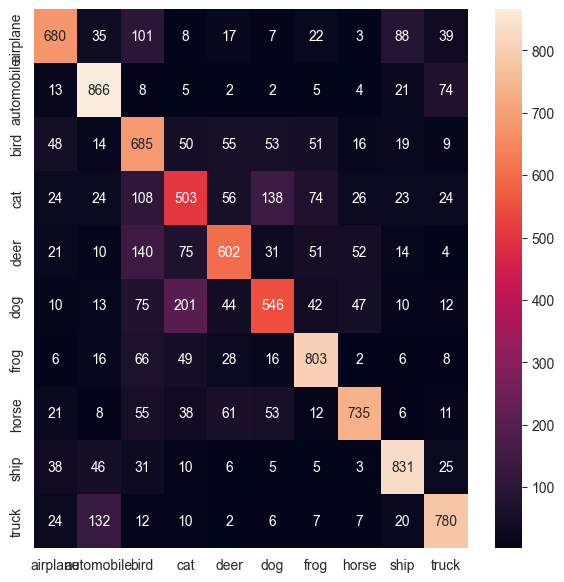

In [17]:
plt.figure(figsize=(7, 7))

c = sns.heatmap(cf_matrix, annot=True, fmt="d")
c.set(xticklabels=label_names, yticklabels=label_names)
plt.plot()

実際は猫なのに犬と分類されていたり、犬なのに猫と分類されている誤りが確認とれる。
解決するためにには、Network の構造を工夫したり犬猫の画像を増やしたり等の工夫を行なうことが必要。